In [206]:
#Importing packages
import numpy as np
import pandas as pd
%matplotlib inline

#load forecasting tools
from statsmodels.tsa.statespace.varmax import VARMAX, VARMAXResults
from pmdarima import auto_arima
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

#ignore warnings
import warnings
warnings.filterwarnings("ignore")


In [207]:
#set seed
import random
random.seed(100)

In [208]:
# define dataset 
series = pd.read_csv(r"C:\Users\IFMRUSER\Desktop\Deep Learning\India_covid19.csv", index_col = 'Date' , parse_dates = True)
#taking the dataset when India crossed 1000 mark 
dfo=series.iloc[67:]
dfo.index.frequency = 'D'
dfo.head()

,Cases,Deaths,Recovered
Date,,,
2020-03-29,1024,27,95
2020-03-30,1251,32,102
2020-03-31,1397,35,123
2020-04-01,1998,58,148
2020-04-02,2543,72,191


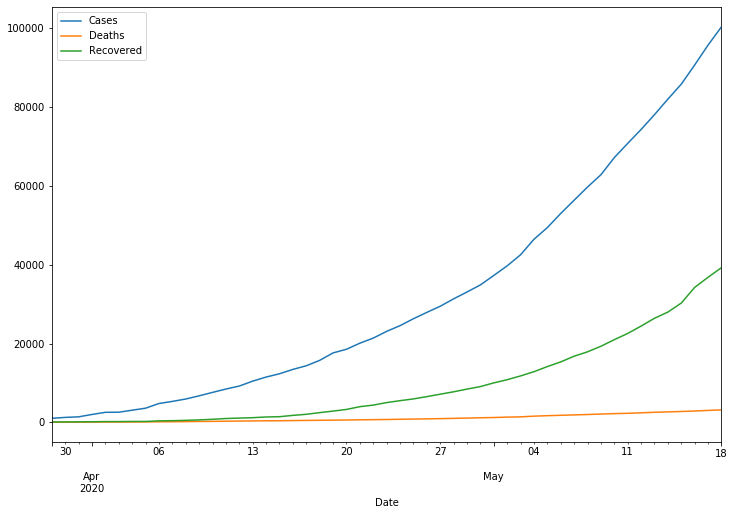

In [209]:
#ploting the data
dfo.columns = ['Cases', 'Deaths', 'Recovered']
dfo.plot(figsize = (12,8))

In [210]:
#applying auto_arima() to find p,d,q
auto_arima(dfo['Cases'],maxiter=1000)

ARIMA(maxiter=1000, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [211]:
#applying auto_arima() to find p,d,q
auto_arima(dfo['Deaths'],maxiter=1000)

ARIMA(maxiter=1000, method='lbfgs', order=(0, 2, 1), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [212]:
#applying auto_arima() to find p,d,q
auto_arima(dfo['Recovered'],maxiter=1000)

ARIMA(maxiter=1000, method='lbfgs', order=(2, 2, 0), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=False, trend=None,
      with_intercept=True)

In [213]:
#2nd order difference for Stationarty as derived from auto_arima()
df_transformed = dfo.diff().diff()
df_transformed = df_transformed.dropna()
df_transformed.head()

,Cases,Deaths,Recovered
Date,,,
2020-03-31,-81.0,-2.0,14.0
2020-04-01,455.0,20.0,4.0
2020-04-02,-56.0,-9.0,18.0
2020-04-03,-521.0,-14.0,-42.0
2020-04-04,491.0,14.0,36.0


In [214]:
#split data into test and train
nobs=5
len(df_transformed)
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]
print(train.shape)
print(test.shape)

(44, 3)
(5, 3)


In [215]:
#applying the VARMA model
model = VARMAX(train, order = (2,1), trend = 'c' )
results = model.fit(maxiter = 1000, disp = False)
results.summary()

Dep. Variable:,"['Cases', 'Deaths', 'Recovered']",No. Observations:,44
Model:,"VARMA(2,1)",Log Likelihood,-768.249
,+ intercept,AIC,1608.497
Date:,"Tue, 19 May 2020",BIC,1672.728
Time:,12:16:10,HQIC,1632.317
Sample:,03-31-2020,,
,- 05-13-2020,,
Covariance Type:,opg,,
Ljung-Box (Q):,"34.01, 24.13, 34.93",Jarque-Bera (JB):,"6.38, 0.03, 1.52"
Prob(Q):,"0.74, 0.98, 0.70",Prob(JB):,"0.04, 0.98, 0.47"
Heteroskedasticity (H):,"1.89, 4.24, 5.19",Skew:,"0.86, -0.03, 0.28"


In [216]:
# storing the forecasted values but this will be in 2nd order dfference
df_forcast = results.forecast(5)
df_forcast

,Cases,Deaths,Recovered
2020-05-14,245.768343,-39.772960,73.418951
2020-05-15,35.585196,14.343083,5.308968
2020-05-16,-209.184825,8.157641,33.557459
2020-05-17,259.234839,5.257614,-17.121125
2020-05-18,148.535105,-1.644062,130.454967


In [217]:
#Inversing the 2nd order difference

# Add the most recent first difference from the training set to the forecast cumulative sum
df_forcast['Cases1d'] = (dfo['Cases'].iloc[-nobs-1]-dfo['Cases'].iloc[-nobs-2]) + df_forcast['Cases'].cumsum()
df_forcast['Deaths1d'] = (dfo['Deaths'].iloc[-nobs-1]-dfo['Deaths'].iloc[-nobs-2]) + df_forcast['Deaths'].cumsum()
df_forcast['Recovered1d'] = (dfo['Recovered'].iloc[-nobs-1]-dfo['Recovered'].iloc[-nobs-2]) + df_forcast['Recovered'].cumsum()


# Now build the forecast values from the first difference set
df_forcast['CasesForecast'] = dfo['Cases'].iloc[-nobs-1] + df_forcast['Cases1d'].cumsum()
df_forcast['DeathsForecast'] = dfo['Deaths'].iloc[-nobs-1] + df_forcast['Deaths1d'].cumsum()
df_forcast['RecoveredForecast'] = dfo['Recovered'].iloc[-nobs-1] + df_forcast['Recovered1d'].cumsum()

In [218]:
#lets now see the forecasted values
df_forcast

,Cases,Deaths,Recovered,Cases1d,Deaths1d,Recovered1d,CasesForecast,DeathsForecast,RecoveredForecast
2020-05-14,245.768343,-39.772960,73.418951,4008.768343,96.227040,2053.418951,82063.768343,2647.227040,28453.418951
2020-05-15,35.585196,14.343083,5.308968,4044.353540,110.570124,2058.727920,86108.121883,2757.797164,30512.146871
2020-05-16,-209.184825,8.157641,33.557459,3835.168715,118.727764,2092.285379,89943.290598,2876.524928,32604.432250
2020-05-17,259.234839,5.257614,-17.121125,4094.403553,123.985379,2075.164254,94037.694151,3000.510307,34679.596503
2020-05-18,148.535105,-1.644062,130.454967,4242.938658,122.341317,2205.619221,98280.632809,3122.851624,36885.215724


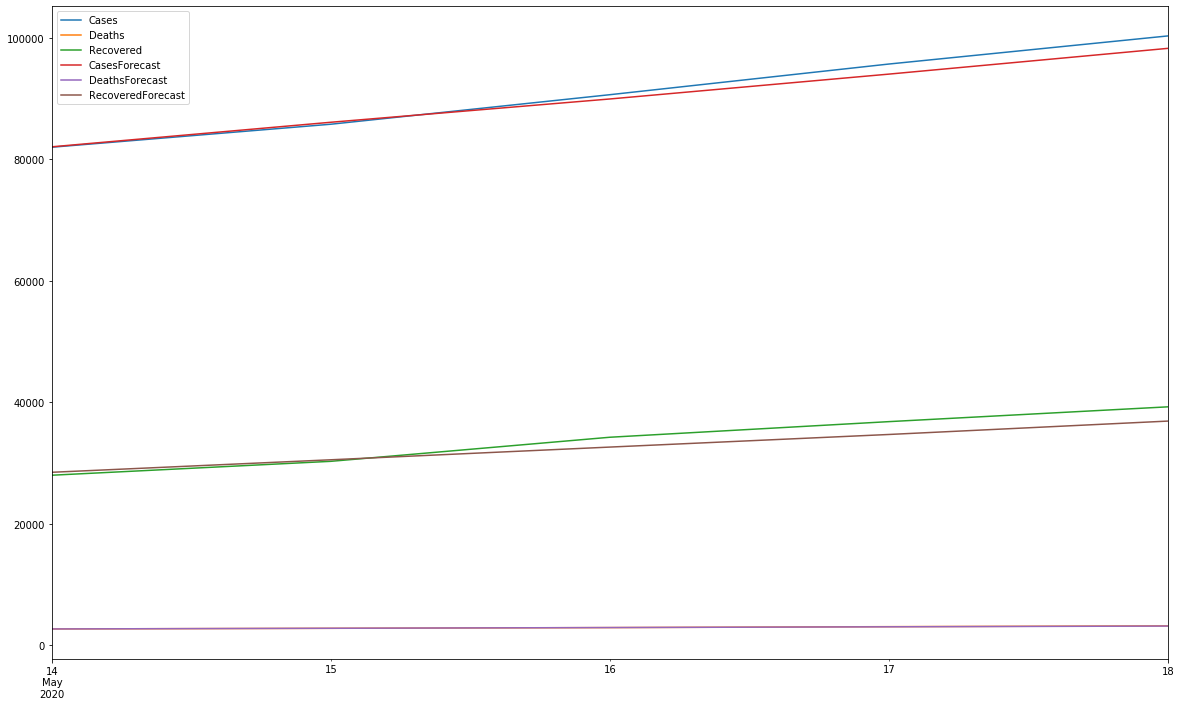

In [219]:
#ploting the forecasted values against actual
pd.concat([dfo.iloc[-nobs:],df_forcast[['CasesForecast','DeathsForecast','RecoveredForecast']]],axis=1)
Final = pd.concat([dfo.iloc[-nobs:],df_forcast[['CasesForecast','DeathsForecast','RecoveredForecast']]],axis=1)
Final.plot(figsize = (20,12))


In [220]:
#Evaluating the model
RMSE1 = rmse(dfo.iloc[-nobs:,0], df_forcast.iloc[:,6])
RMSE2 = rmse(dfo.iloc[-nobs:,1], df_forcast.iloc[:,7])
RMSE3 = rmse(dfo.iloc[-nobs:,2], df_forcast.iloc[:,8])

print(f'Cases RMSE: {RMSE1:.3f}')
print(f'Deaths RMSE: {RMSE2:.3f}')
print(f'Recovered RMSE: {RMSE3:.3f}')

Cases RMSE: 1229.183
Deaths RMSE: 18.736
Recovered RMSE: 1606.815
